# Limpieza de datos

In [78]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

import numpy as np

import re

import pylab as plt
import seaborn as sns

In [79]:
def check_nan(df: pd.DataFrame) -> None:
    
    """
    Recibe un dataframe y enseña el % de nulos y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # % de valores nulos
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    # grafico de nulos en el dataframe

    #inicializa la figura
    plt.figure(figsize=(10, 6))  # 100X60  pixeles


    sns.heatmap(df.isna(),       # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',      # mapa de color
                cbar=False           # sin barra lateral
               )

    plt.show();

### Limpieza actor.csv

In [12]:
actor = pd.read_csv(r"..\data\actor.csv")
actor.head(5)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


In [13]:
actor["first_name"] = actor["first_name"].str.lower()
actor["last_name"] = actor["last_name"].str.lower()

In [14]:
actor["first_name"] = actor["first_name"].str.capitalize()
actor["last_name"] = actor["last_name"].str.capitalize()

In [15]:
actor = actor.drop("last_update", axis=1)

In [16]:
actor.head(5)

,actor_id,first_name,last_name
0,1,Penelope,Guiness
1,2,Nick,Wahlberg
2,3,Ed,Chase
3,4,Jennifer,Davis
4,5,Johnny,Lollobrigida


'N nan cols: 0'

Series([], dtype: float64)

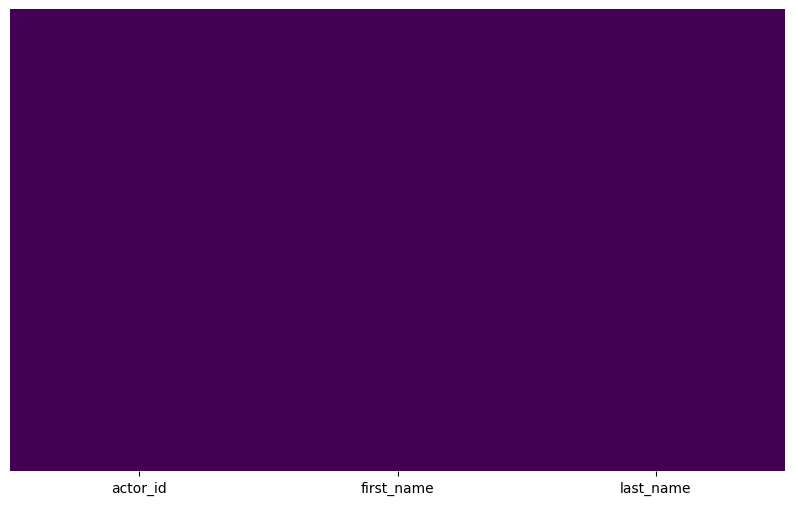

In [80]:
check_nan(actor)

In [17]:
actor.to_csv('../data/actor_clean.csv', index=False)

### Limpieza category.csv

In [23]:
category = pd.read_csv(r"..\data\category.csv")
category.head(5)

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [24]:
category["name"]

0          Action
1       Animation
2        Children
3        Classics
4          Comedy
5     Documentary
6           Drama
7          Family
8         Foreign
9           Games
10         Horror
11          Music
12            New
13         Sci-Fi
14         Sports
15         Travel
Name: name, dtype: object

In [25]:
category = category.drop("last_update", axis=1)

'N nan cols: 0'

Series([], dtype: float64)

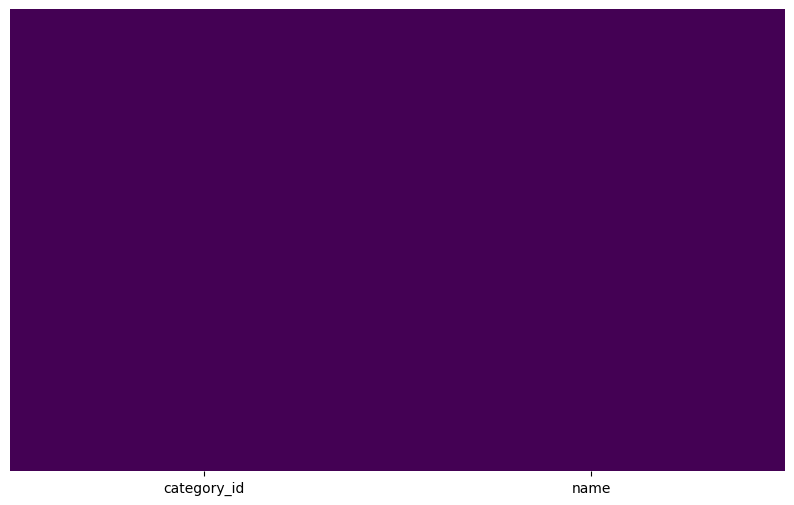

In [81]:
check_nan(category)

In [26]:
category.to_csv('../data/category_clean.csv', index=False)

### Limpieza film.csv

In [91]:
film = pd.read_csv(r"..\data\film.csv")
film.head(5)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,NaN,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,NaN,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,NaN,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,NaN,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


'N nan cols: 1'

original_language_id    100.0
dtype: float64

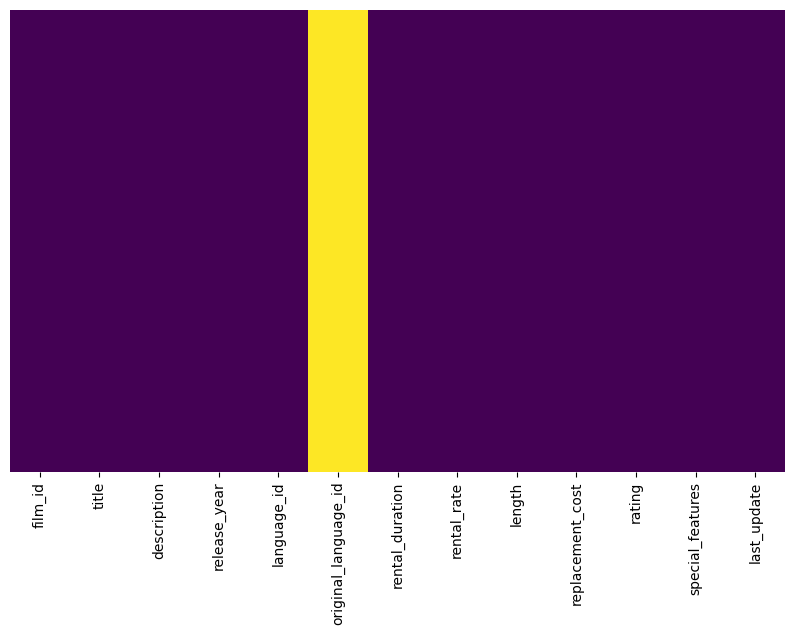

In [92]:
check_nan(film)

In [93]:
film = film.drop("original_language_id", axis=1)
film = film.drop("last_update", axis=1)

In [94]:
film.head(5)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes"
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes"
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,Deleted Scenes


In [95]:
film.to_csv('../data/film_clean.csv', index=False)

### Limpieza inventory.csv

In [69]:
inventory = pd.read_csv(r"..\data\inventory.csv")
inventory.head(5)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [70]:
inventory = inventory.drop("last_update", axis=1)

'N nan cols: 0'

Series([], dtype: float64)

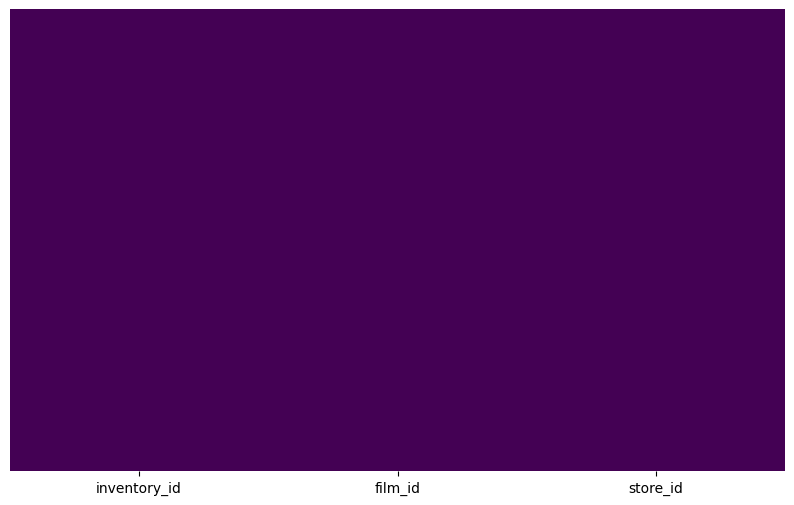

In [83]:
check_nan(inventory)

In [98]:
inventory.to_csv('../data/inventory_clean.csv', index=False)

### Limpieza language.csv

In [39]:
language = pd.read_csv(r"..\data\language.csv")
language.head(5)

,language_id,name,last_update
0,1,English,2006-02-15 05:02:19
1,2,Italian,2006-02-15 05:02:19
2,3,Japanese,2006-02-15 05:02:19
3,4,Mandarin,2006-02-15 05:02:19
4,5,French,2006-02-15 05:02:19


In [40]:
language = language.drop("last_update", axis=1)

In [41]:
language.head(5)

,language_id,name
0,1,English
1,2,Italian
2,3,Japanese
3,4,Mandarin
4,5,French


'N nan cols: 0'

Series([], dtype: float64)

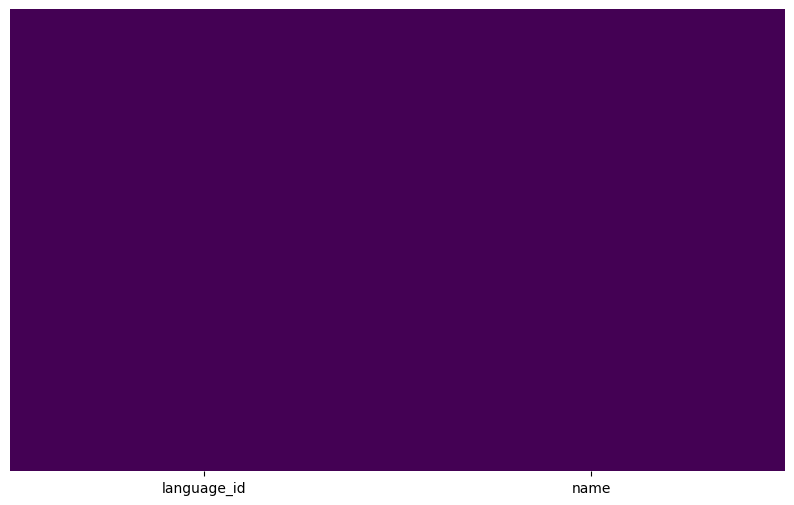

In [84]:
check_nan(language)

In [42]:
language.to_csv('../data/language_clean.csv', index=False)

### Limpieza old_HDD.csv

In [58]:
hdd = pd.read_csv(r"..\data\old_HDD.csv")
hdd.head(5)

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14


In [59]:
hdd["first_name"] = hdd["first_name"].str.lower()
hdd["last_name"] = hdd["last_name"].str.lower()
hdd["title"] = hdd["title"].str.lower()

In [60]:
hdd["first_name"] = hdd["first_name"].str.capitalize()
hdd["last_name"] = hdd["last_name"].str.capitalize()
hdd["title"] = hdd["title"].str.capitalize()

In [61]:
hdd.head(5)

,first_name,last_name,title,release_year,category_id
0,Penelope,Guiness,Academy dinosaur,2006,6
1,Penelope,Guiness,Anaconda confessions,2006,2
2,Penelope,Guiness,Angels life,2006,13
3,Penelope,Guiness,Bulworth commandments,2006,10
4,Penelope,Guiness,Cheaper clyde,2006,14


'N nan cols: 0'

Series([], dtype: float64)

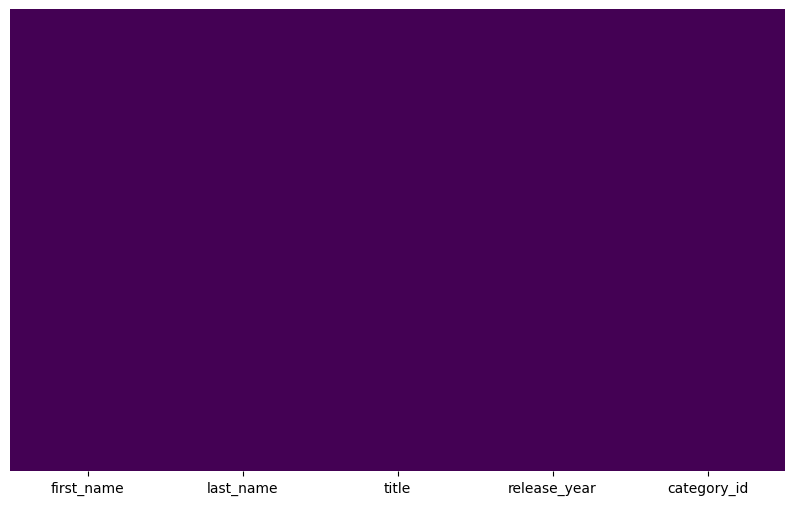

In [85]:
check_nan(hdd)

In [96]:
hdd.to_csv('../data/old_HDD_clean.csv', index=False)

### Limpieza rental.csv

In [63]:
rental = pd.read_csv(r"..\data\rental.csv")
rental.head(5)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [67]:
rental = rental.drop("last_update", axis=1)

'N nan cols: 0'

Series([], dtype: float64)

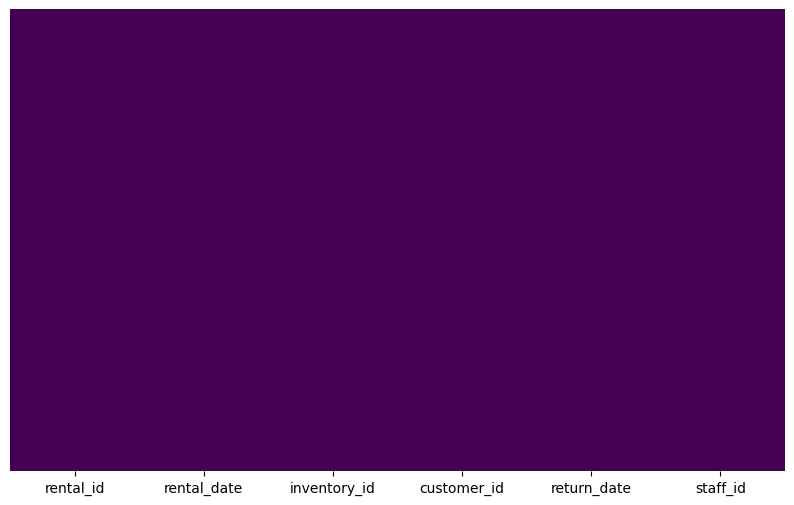

In [86]:
check_nan(rental)

In [68]:
rental.head(5)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1
